In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
data = pd.read_csv('가자미.csv')
data['ds'] = pd.to_datetime(data['기간'])  # 'ds' 컬럼을 날짜 형식으로 변환
data.rename(columns={'단가': 'y'}, inplace=True)  # 종속 변수 컬럼 이름을 'y'로 변경

In [3]:
model1 = Prophet(seasonality_prior_scale=1)
model1.fit(data)

23:51:14 - cmdstanpy - INFO - Chain [1] start processing
23:51:15 - cmdstanpy - INFO - Chain [1] done processing


In [4]:
future = model1.make_future_dataframe(periods=12, freq='M')  # 향후 12개월의 날짜 생성
forecast = model1.predict(future)

In [5]:
forecast['yhat'] = forecast['yhat'].apply(lambda x: max(0, x))

In [6]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
25,2023-02-28,7463.676234,4313.120276,10588.227150
26,2023-03-31,3511.667297,405.115009,6391.929587
27,2023-04-30,6991.079347,3747.573734,9864.009373
28,2023-05-31,19882.237651,16773.629509,22936.850311
29,2023-06-30,0.000000,-8710.757001,-2684.741192
30,2023-07-31,17299.154710,14315.452113,20230.284359
31,2023-08-31,21018.966867,18092.858078,24026.750697
32,2023-09-30,6186.375249,3107.919265,9014.943115
33,2023-10-31,11663.619886,8746.954415,14718.084184
34,2023-11-30,1.061990,-2927.900072,2875.099725


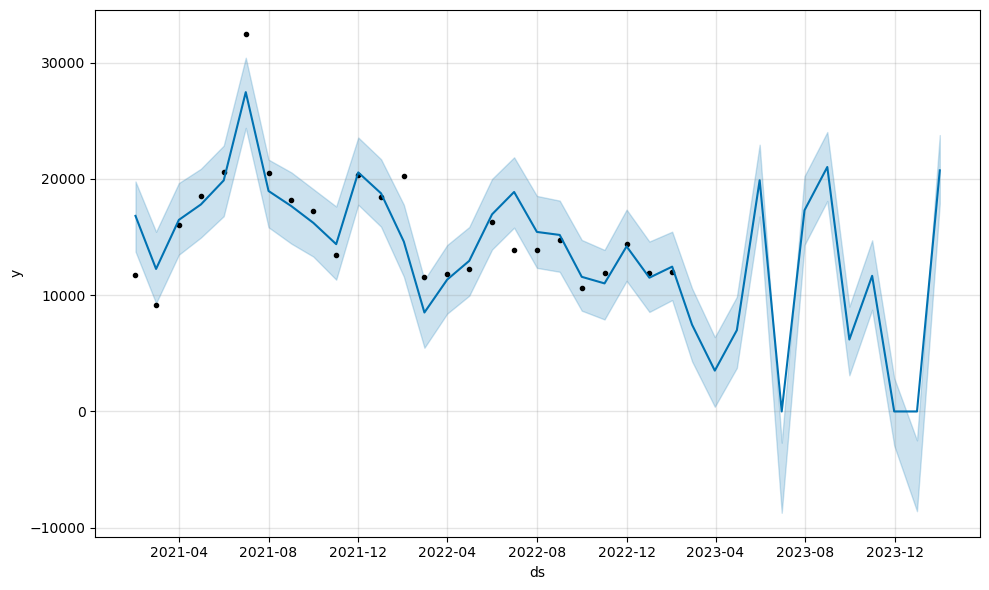

In [7]:
fig1 = model1.plot(forecast)

In [ ]:
fig2 = model1.plot_components(forecast)

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [9]:
data = pd.read_csv('가자미.csv')

In [10]:
quantity = data['물량-평균'].values
price = data['단가'].values

In [11]:
model = LinearRegression()
model.fit(quantity.reshape(-1, 1), price)

LinearRegression()

In [12]:
print("물량과 가격 분석 결과:")
print("기울기 (회귀 계수):", model.coef_[0])
print("절편 (절편 값):", model.intercept_)

물량과 가격 분석 결과:
기울기 (회귀 계수): -12.268785901395178
절편 (절편 값): 16051.698837094247


In [13]:
future_quantity = 50 # 예측할 물량
predicted_price = model.predict([[future_quantity]])

In [14]:
print("물량에 따른 예측 가격:")
print("물량:", future_quantity)
print("예측 가격:", predicted_price[0])

물량에 따른 예측 가격:
물량: 50
예측 가격: 15438.259542024489
